# Generic Gradient Descent
- Problem type: Regression with multiple features

In this code, we will discuss multivariate gradient descent.

### Objective
See 3 different types of gradient descent

- Batch gradient descent
- Stochastic gradient descent
- Mini batch gradient descent

**Author**: Ashish Gupta

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns

In [3]:
X,Y = make_regression(n_samples = 100, n_features=3, noise = 1000.0, n_informative=3, shuffle = True, random_state=3) 
X.shape,Y.shape, type(X), type(Y)

((100, 3), (100,), numpy.ndarray, numpy.ndarray)

In [4]:
# Preprocessing step
# Our X is almost there, we just need to add 1s in front. X= [1 X]
ones = np.ones((X.shape[0],1))
ones.shape, X.shape
X_appended = np.append(ones, X, axis = 1)
X_appended[:5]

array([[ 1.        ,  0.56195167,  1.09465308, -0.29382124],
       [ 1.        , -1.15903647,  0.90831872,  1.50326195],
       [ 1.        , -1.74411025,  0.28703516,  0.22575027],
       [ 1.        , -0.52526465, -0.9064947 , -1.67563463],
       [ 1.        ,  0.35081584, -1.41987131,  1.6265736 ]])

In [5]:
X= X_appended.copy()

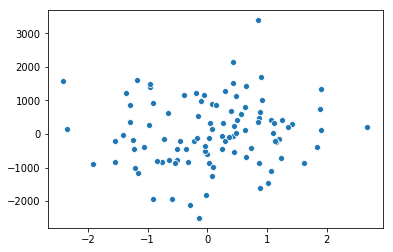

In [6]:
# sns is a lot easier to plot. It uses exactly the same code except plt.plot changes to sns.lineplot or sns.scatterplot
sns.scatterplot(x = X[:,2], y= Y)


Large noise is added to see the distinct effect of stochastic, mini batch and batch gradient descent

In [7]:
# Helper functions

def hypothesis(x,theta):
    
    # assumes x to be appended with array of 1s in the start
    result = np.dot(theta,x.T)
    return result

def predictions(X,theta):
    # stays the same
    y_pred = []
    
    for i in range(X.shape[0]):
        pred = hypothesis(X[i],theta)
        y_pred.append(pred)
    y_pred = np.array(y_pred)
    return y_pred
    
def get_error(X,Y,theta):
    # Least Square Error
    e = 0
    m = X.shape[0]
    for i in range(m):
        e += (hypothesis(X[i],theta)-Y[i])**2
        
    return e

def getGradients(X,Y,theta):    
    grads = np.zeros((X.shape[1]))
    n = len(grads) # no. of features inc. bias
    m = X.shape[0]
    for i in range(m):
        YPi = hypothesis(X[i],theta)
        for grad_index in range(n):
            grads[grad_index] += (YPi - Y[i])* X[i,grad_index]           
        
    return grads

https://www.quora.com/Whats-the-difference-between-gradient-descent-and-stochastic-gradient-descent

You can refer to first answer in the link above for the algorithms

In [8]:
def gradientDescent(X,Y,maxItr=100,learning_rate=0.001):
    
    # Write code here
    num_features = None
    theta = None
    #
    error = []
    
    for i in range(maxItr):
        # Write code here
        grad = None
        #
        e = get_error(X,Y,theta)
        
        # for loop for multi feature set
        for i in range(num_features):
            # Write code here
            theta[i]= None
            #
            
        error.append(e)
        
    return theta,error

#### STOCHASTIC GRADIENT DESCENT (SGD)

- In GD optimization, we compute the cost gradient based on the complete training set; hence, we sometimes also call it batch GD. In case of very large datasets, using GD can be quite costly since we are only taking a single step for one pass over the training set -- thus, the larger the training set, the slower our algorithm updates the weights and the longer it may take until it converges to the global cost minimum (note that the SSE cost function is convex).

- In Stochastic Gradient Descent (SGD; sometimes also referred to as iterative or on-line GD), we don't accumulate the weight updates 

https://www.quora.com/Whats-the-difference-between-gradient-descent-and-stochastic-gradient-descent

You can refer to first answer in the link above for the algorithms


In [9]:
def stochasticGradientDescent(X,Y,maxItr=100, learning_rate = 0.001):
    
    # Write code here
    num_features = None
    theta = None
    #
    
    error = []
    
    graph_count=0
    for i in range(maxItr):
        for j in range(len(X)): # j is index of each training example
            for k in range(len(theta)):
                # Write code here  
                theta[k]=None
                #
                
                graph_count+=1
                if graph_count%100 == 0:
                    e=get_error(X,Y,theta)
                    error.append(e)

    return theta,error

#### MINI-BATCH GRADIENT DESCENT (MB-GD)

Mini-Batch Gradient Descent (MB-GD) a compromise between batch GD and SGD. In MB-GD, we update the model based on smaller groups of training samples; instead of computing the gradient from 1 sample (SGD) or all n training samples (GD), we compute the gradient from 1 < k < n training samples (a common mini-batch size is k=50).
MB-GD converges in fewer iterations than GD because we update the weights more frequently; however, MB-GD let's us utilize vectorized operation, which typically results in a computational performance gain over SGD.

https://www.quora.com/Whats-the-difference-between-gradient-descent-and-stochastic-gradient-descent

You can refer to first answer in the link above for the algorithms

In [10]:
def miniBatchGradientDescent(X,Y,maxItr=100, learning_rate = 0.001, batch_size = 50):
    
    # Write code here
    num_features = None
    theta = None
    #
    error = []
    
    for i in range(maxItr):
        for batch in range(round(len(X)/(batch_size*1.0))+1): 
            for k in range(len(theta)):
                # Write code here
                grad = None
                theta[k]= None
                #
                
                e=get_error(X,Y,theta)
                error.append(e)

    return theta,error

In [12]:
plt.figure(1)
theta, error= gradientDescent(X,Y,50,0.001)
sns.scatterplot(data = np.array(error))
plt.title("Batch Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Error")

plt.figure(2)
theta_stochastic, error_stochastic= stochasticGradientDescent(X,Y,50,0.001)
sns.lineplot(data = np.array(error_stochastic))
plt.title("Stochastic Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Error")
                                      
plt.figure(3)
theta_stochastic, error_stochastic= miniBatchGradientDescent(X,Y,50,0.001, batch_size=50)
sns.lineplot(data = np.array(error_stochastic))
plt.title("Mini Batch Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Error")

plt.show()

Note that the error is of the order e^7. This is because of noise = 1000, the huge error is natural. It was done to show the zig zag nature of cost at convergence. Stochastic gradient descent is pseudo convex and it almost always converges ( You never have to worry about whether it will converge or not)